In [41]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV



#simulated softdrink data, with user liking yes/no in the "liked" column
#coca-cola and other companies obviously have survey data
data = {
    "cherry": [random.randint(0, 1) for _ in range(100000)],
    "orange": [random.randint(0, 1) for _ in range(100000)],
    "candy_cane": [random.randint(0, 1) for _ in range(100000)],
    "cotton_candy": [random.randint(0, 1) for _ in range(100000)],
    "grape": [random.randint(0, 1) for _ in range(100000)],
    "liked": [random.randint(0, 1) for _ in range(100000)]
}

df = pd.DataFrame(data)

print(df.head())

   cherry  orange  candy_cane  cotton_candy  grape  liked
0       0       0           0             0      1      0
1       1       1           0             1      0      0
2       1       0           1             1      0      0
3       0       0           0             1      0      0
4       0       0           1             0      0      0


In [23]:
#run xgboost to learn which flavours people prefer
x = df[['cherry', 'orange', 'candy_cane', 'cotton_candy', 'grape']]
y = df['liked']

In [32]:
#80-20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2,stratify=y)

In [33]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
#see what people like the most
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [35]:
feature_importance_df.head()

,Feature,Importance
1,orange,0.431757
0,cherry,0.210567
3,cotton_candy,0.125808
2,candy_cane,0.117641
4,grape,0.114227


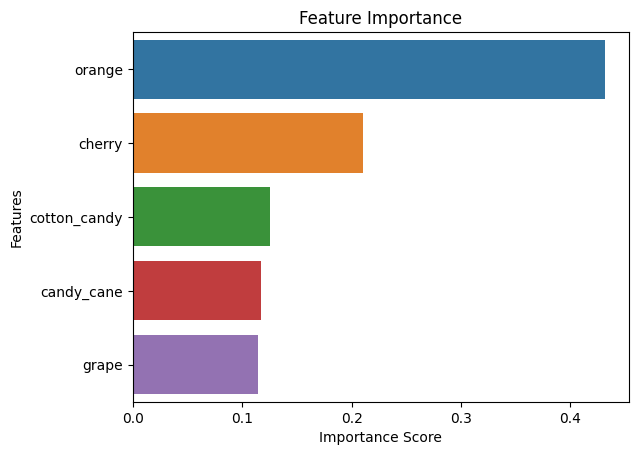

In [36]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [37]:
model = xgb.XGBClassifier()
#Fit Recursive feature elimination with cross-validation (RFECV)
rfecv = RFECV(estimator=model, cv=5, scoring='accuracy')
rfecv.fit(x_train, y_train)
print("Optimal number of features: ", rfecv.n_features_)

Optimal number of features:  3


In [40]:
selected_features = [f for i, f in enumerate(x.columns) if rfecv.support_[i]]

X_train_selected = x_train[selected_features]
X_test_selected = x_test[selected_features]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

print(selected_features)

['cherry', 'orange', 'cotton_candy']
